This notebook is for the purposes of analysing NAPLAN data for each Sirius College campus relative to school-wide and nation-wide performances.

Since we already have the full data per year level and the national dataset:
1. Read both datasets in
2. Identify the summary statistics for the whole school
3. Subset the main dataframe by campus
4. Perform comparative analysis

Note that there may be some missing values present in the school-wide data frame, specifically in the score reporting for each outcome. The results are missing due to the student being absent from the test. As such, we will neither be removing nor imputing the values.

Note: conda activate naplan_analysis
conda env list

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import os as os 
import campus_function

In [2]:
# Check current wd
os.getcwd()

'c:\\Users\\Debbie.Chong\\Virtual_env'

In [3]:
# Reading in dataframes

dt_all = pd.read_csv("./NAPLAN_General_Analysis/Year3_FINAL.csv")
dt_national = pd.read_csv("./NAPLAN_General_Analysis/NationalData_Yr3.csv")

## Cleaning Year Level-wide Data

In [4]:
# Check
#dt_all.head()
dt_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   APS Year                           218 non-null    int64  
 1    Reporting Test                    218 non-null    object 
 2   First Name                         218 non-null    object 
 3    Second Name                       1 non-null      object 
 4    Surname                           218 non-null    object 
 5   READING                            218 non-null    int64  
 6   READING Proficiency                218 non-null    object 
 7   WRITING                            215 non-null    float64
 8   WRITING Proficiency                215 non-null    object 
 9   SPELLING                           217 non-null    float64
 10  SPELLING Proficiency               217 non-null    object 
 11  NUMERACY                           216 non-null    float64

In [5]:
# Dropping columns
# Method chaining
dt_subset = (
    dt_all
    .drop(['APS Year', ' Reporting Test', 'Reporting School Name'], axis=1)
    .drop(dt_all.filter(regex='Proficiency').columns, axis=1)
    .rename(columns={'Cases ID': 'Student ID'})
)

In [6]:
# Cleaning the Campus Column
dt_subset['Home School Name'] = (
    dt_subset['Home School Name']
    .str.rsplit(' - ', n=1)
    .str[-1]
    .astype('category')
)

In [7]:
dt_subset.head()

,First Name,Second Name,Surname,READING,WRITING,SPELLING,NUMERACY,GRAMMAR & PUNCTUATION,Home Group,Date of birth,Gender,LBOTE,ATSI,Home School Name,Student ID
0,AHMAD,NaN,UMER,417,492.0,467.0,375.0,502.0,3-A,3/01/2017,M,Y,N,Keysborough Campus,35821
1,AHMAD RASHID,NaN,OMARI,441,379.0,401.0,383.0,389.0,3-B,30/04/2016,M,N,N,Keysborough Campus,33253
2,AINAZHA,NaN,ADIL,552,492.0,526.0,421.0,480.0,3-B,22/03/2016,F,Y,N,Keysborough Campus,31524
3,ALI,NaN,NAJIBI,459,396.0,453.0,NaN,363.0,3-B,16/10/2016,M,Y,N,Keysborough Campus,31126
4,ALI MOHAMMED,GISMELSEED,ALHASSAN,352,412.0,318.0,369.0,346.0,3-A,9/07/2016,M,Y,N,Keysborough Campus,33015


## Cleaning National-wide Data

In [8]:
# Check - nation-wide data
dt_national.head()

,APS Year,Reporting Test,Group Description,Outcome,Mean,Median,p10,p20,p25,p50,p75,p80,p90
0,2025,YR3P,ALL,READING,402.17,409.81,276.19,325.68,343.97,409.81,465.80,478.58,510.9
1,2025,YR3P,ALL,WRITING,413.89,419.44,326.36,364.68,376.54,419.44,460.46,470.04,494.2
2,2025,YR3P,ALL,SPELLING,405.05,411.24,288.54,331.67,347.65,411.24,467.18,480.39,514.4
3,2025,YR3P,ALL,NUMERACY,405.32,406.02,312.85,345.92,357.96,406.02,453.30,465.02,496.6
4,2025,YR3P,ALL,GRAMMAR & PUNCTUATION,408.44,416.90,265.46,325.48,345.84,416.90,478.97,493.69,532.2


## Subsetting Campuses

In [9]:
df_campus = campus_function.subset_loop(dt_subset, 'Home School Name')

Keysborough Campus is stored in dictionary_name['Keysborough Campus']
Ibrahim Dellal Campus is stored in dictionary_name['Ibrahim Dellal Campus']
Shepparton Campus is stored in dictionary_name['Shepparton Campus']
Dallas Campus is stored in dictionary_name['Dallas Campus']


## Finding Summary Stats

In [10]:
# Generating summary statistics for the whole school
school_summarystat = campus_function.summary_stats(dt_subset, cols_of_interest=['READING','WRITING','SPELLING','NUMERACY','GRAMMAR & PUNCTUATION'])

In [11]:
print(school_summarystat)

                           n    Mean  Median    Std    Min  25th %ile  \
READING                218.0  426.06   431.0  68.76  230.0     374.25   
WRITING                215.0  449.20   461.0  50.93  258.0     412.00   
SPELLING               217.0  438.89   442.0  70.56  232.0     383.00   
NUMERACY               216.0  412.44   404.5  62.78  238.0     375.75   
GRAMMAR & PUNCTUATION  217.0  426.77   426.0  82.91  177.0     371.00   

                       75th %ile    Max  
READING                    483.0  604.0  
WRITING                    477.0  573.0  
SPELLING                   491.0  626.0  
NUMERACY                   452.5  629.0  
GRAMMAR & PUNCTUATION      489.0  629.0  


In [12]:
# Generating summary statistics for the individual campuses

# List of columns of interest
cols_to_summarise = ['READING', 'WRITING', 'SPELLING', 'NUMERACY', 'GRAMMAR & PUNCTUATION']
# Running function
campus_summaries = campus_function.summary_loop(df_campus, cols_to_summarise=cols_to_summarise, print_output=True)

Summary statistics calculated for Keysborough Campus
Summary statistics calculated for Ibrahim Dellal Campus
Summary statistics calculated for Shepparton Campus
Summary statistics calculated for Dallas Campus

Summary Statistics for Keysborough Campus
                          n    Mean  Median    Std    Min  25th %ile  \
READING                52.0  422.31   439.5  73.99  230.0     368.00   
WRITING                50.0  446.44   461.0  46.24  319.0     396.00   
SPELLING               52.0  438.85   444.0  71.63  286.0     394.25   
NUMERACY               51.0  405.69   396.0  60.92  285.0     370.50   
GRAMMAR & PUNCTUATION  52.0  424.06   412.5  85.94  262.0     354.00   

                       75th %ile    Max  
READING                   479.25  552.0  
WRITING                   477.00  534.0  
SPELLING                  491.00  580.0  
NUMERACY                  447.50  600.0  
GRAMMAR & PUNCTUATION     500.00  629.0  

Summary Statistics for Ibrahim Dellal Campus
                 

## Comparative Analysis

### Comparing performances between campus and school

In [13]:
# Making label for campus or whole school
# School-level
school_summary = school_summarystat.copy() # Making a copy to avoid modifying original dataframe
school_summary['Campus'] = 'Whole School' # Adding new column
school_summary = school_summary.reset_index() # Resetting the domains so they are no longer the index but a regular column
school_summary.rename(columns={school_summary.columns[0]: 'Domain'}, inplace=True) # Renaming the column
# Campus-level
for campus_name, df in campus_summaries.items():
    df = df.copy()
    df['Campus'] = campus_name
    df = df.reset_index()
    df.rename(columns={df.columns[0]: 'Domain'}, inplace=True)
    campus_summaries[campus_name] = df #Replacing the old summary with the new one

# Combining dataframes
all_summaries = pd.concat( # turning list into a nig dataframe
    [school_summary] + list(campus_summaries.values()), # Maing a list of dataframes
    ignore_index=True
)
# Sort by domain for easier comparisons
all_summaries = all_summaries.sort_values(by=['Domain', 'Campus']) # Sorting dataframe by domain name
# Print to check
print(all_summaries)

                   Domain      n    Mean  Median    Std    Min  25th %ile  \
24  GRAMMAR & PUNCTUATION   96.0  434.01   427.0  76.71  185.0     385.50   
14  GRAMMAR & PUNCTUATION   47.0  426.28   432.0  91.23  209.0     383.50   
9   GRAMMAR & PUNCTUATION   52.0  424.06   412.5  85.94  262.0     354.00   
19  GRAMMAR & PUNCTUATION   22.0  402.64   404.5  83.95  177.0     353.25   
4   GRAMMAR & PUNCTUATION  217.0  426.77   426.0  82.91  177.0     371.00   
23               NUMERACY   96.0  416.06   404.5  60.44  280.0     377.00   
13               NUMERACY   47.0  417.32   432.0  70.47  238.0     386.50   
8                NUMERACY   51.0  405.69   396.0  60.92  285.0     370.50   
18               NUMERACY   22.0  401.86   399.0  61.45  282.0     376.25   
3                NUMERACY  216.0  412.44   404.5  62.78  238.0     375.75   
20                READING   97.0  433.91   435.0  62.64  274.0     392.00   
10                READING   47.0  427.00   432.0  73.70  238.0     373.00   

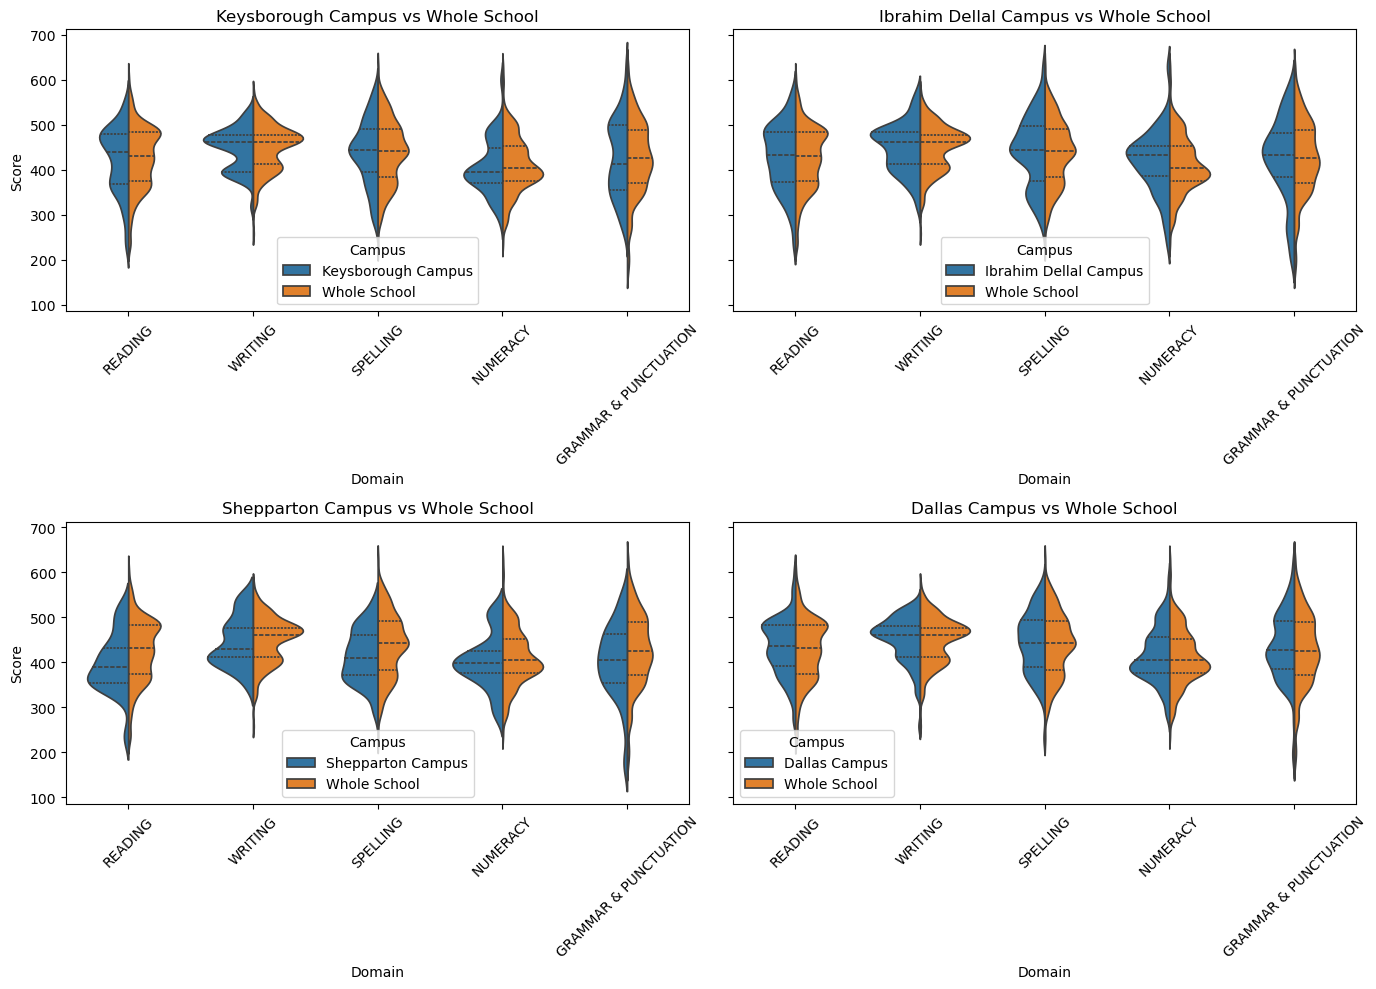

In [14]:
# Visualising 
# Turning the raw data into a long dataframe for plotting
domain_name = ['READING', 'WRITING', 'SPELLING', 'NUMERACY', 'GRAMMAR & PUNCTUATION'] # list of domain names
# Melting to turn the wide dataframe into long dataframe format
df_campuslong = campus_function.df_melt(dt_subset, id_vars=['Home School Name'], value_vars=domain_name, var_name='Domain', value_name='Score')

# Adding new column
df_campuslong['Campus'] = df_campuslong['Home School Name']
df_campuslong.loc[:, 'Campus'] = df_campuslong['Campus'].astype(str)
# Adding 'Whole School' as group
df_whole = df_campuslong.copy() # Duplicate all rows
df_whole['Campus'] = 'Whole School' # Labelling as whole school

# Combining data frames
df_all = pd.concat([df_campuslong, df_whole], ignore_index=True)

# Visualising
campuses = dt_subset['Home School Name'].unique()
n_campuses = len(campuses)

# Setup subplots grid size - e.g., 2 columns, adjust rows accordingly
ncols = 2
nrows = (n_campuses + 1) // ncols  # ceiling division

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, nrows * 5), sharey=True)
axes = axes.flatten()  # Flatten in case of multiple rows

for i, campus in enumerate(campuses):
    ax = axes[i]
    # Filter for campus + whole school
    df_plot = df_all[(df_all['Campus'] == campus) | (df_all['Campus'] == 'Whole School')]

    # Plot violin plot on the given axis
    sns.violinplot(
        data=df_plot,
        x='Domain',
        y='Score',
        hue='Campus',
        split=True,
        bw_adjust=0.7,
        cut=2,
        ax=ax,
        inner="quartile"
    )
    ax.set_title(f'{campus} vs Whole School')
    ax.tick_params(axis='x', rotation=45)

# Remove empty subplots if any
for j in range(i+1, len(axes)): # type: ignore
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Comparing performances between campus and nation

In [15]:
# Getting the data ready

# Keeping columns required from the school-wide dataset
# Keeping columns
dt_school = all_summaries[['Domain', 'Mean', 'Median', '25th %ile', '75th %ile', 'Campus']]
# Renaming columns
col_mappingdict = {
    'Domain': 'Domain',
    'Mean': 'Mean',
    'Median': 'Median',
    '25th %ile': 'Q1',
    '75th %ile': 'Q3',
    'Campus': 'Label'
}
dt_school = campus_function.col_rename(dt_school, mapping_dict=col_mappingdict) # Running function

# Keeping rows and columns from the national dataset
# Filtering
dt_nation = dt_national[dt_national['Group Description'] == 'ALL']
# Keeping columns
dt_nation = dt_nation[['Outcome', 'Mean', 'Median', 'p25', 'p75', 'Group Description']]
# Renaming columns
nation_mappingdict = {
    'Outcome': 'Domain',
    'Mean': 'Mean',
    'Median': 'Median',
    'p25': 'Q1',
    'p75': 'Q3',
    'Group Description': 'Label'    
}
dt_nation = campus_function.col_rename(dt_nation, mapping_dict=nation_mappingdict)
# Changing label to 'nation'
dt_nation['Label'] = 'Nation'

In [16]:
# Concatenating the datsets together
dt_schoolNation = pd.concat([dt_school, dt_nation])

# Sorting labels so we can plot in order
dt_schoolNation['Label'] = pd.Categorical(dt_schoolNation['Label'], # changing to categorical so we can sort better
    categories=['Dallas Campus', 'Ibrahim Dellal Campus', 'Keysborough Campus',
                'Shepparton Campus', 'Whole School', 'Nation'], ordered=True)
# Sorting
dt_schoolNation = dt_schoolNation.sort_values(by=['Domain', 'Label'])

In [17]:
print(dt_schoolNation)

                   Domain    Mean  Median      Q1      Q3  \
24  GRAMMAR & PUNCTUATION  434.01  427.00  385.50  492.00   
14  GRAMMAR & PUNCTUATION  426.28  432.00  383.50  482.50   
9   GRAMMAR & PUNCTUATION  424.06  412.50  354.00  500.00   
19  GRAMMAR & PUNCTUATION  402.64  404.50  353.25  463.25   
4   GRAMMAR & PUNCTUATION  426.77  426.00  371.00  489.00   
4   GRAMMAR & PUNCTUATION  408.44  416.90  345.84  478.97   
23               NUMERACY  416.06  404.50  377.00  457.00   
13               NUMERACY  417.32  432.00  386.50  452.00   
8                NUMERACY  405.69  396.00  370.50  447.50   
18               NUMERACY  401.86  399.00  376.25  425.00   
3                NUMERACY  412.44  404.50  375.75  452.50   
3                NUMERACY  405.32  406.02  357.96  453.30   
20                READING  433.91  435.00  392.00  483.00   
10                READING  427.00  432.00  373.00  484.50   
5                 READING  422.31  439.50  368.00  479.25   
15                READIN

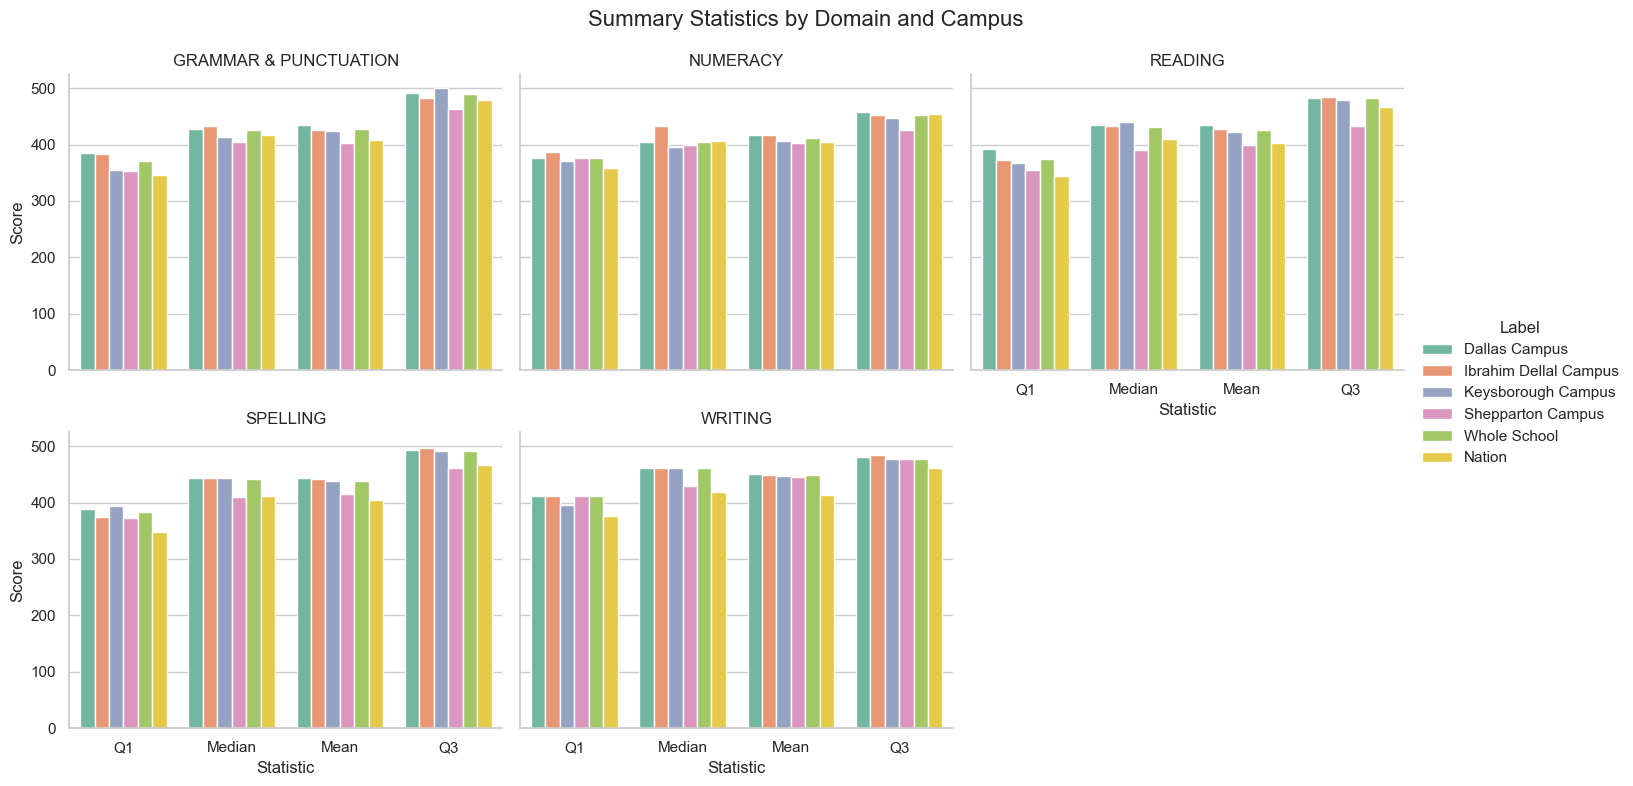

In [18]:
# Plotting boxplots

# Convert to long format for seperate plotting
stat_to_plot = ['Q1', 'Median', 'Mean', 'Q3'] # change this to change the order
df_campuswide = campus_function.df_melt(dt_schoolNation, id_vars=['Domain', 'Label'], value_vars=stat_to_plot, var_name='Statistic', value_name='Score')

# Plotting
campus_plot=campus_function.plot_comparison(df_campuswide,hue='Label', title='Summary Statistics by Domain and Campus')

## Gender, LBOTE, and ATSI Performances

### Gender Analysis

In [19]:
# Generating summary statistics for the genders

# Changing M --> BOYS and F --> GIRLS
dt_subset['Gender'] = dt_subset['Gender'].str.replace('M', 'BOYS').str.replace('F', 'GIRLS')

# Making dictionary for the genders
df_gender = campus_function.subset_loop(dt_subset, 'Gender')

# Summary stats
cols_to_summarise = ['READING', 'WRITING', 'SPELLING', 'NUMERACY', 'GRAMMAR & PUNCTUATION'] # cols of interest
gender_summaries = campus_function.summary_loop(df_gender, cols_to_summarise=cols_to_summarise, print_output=True)

BOYS is stored in dictionary_name['BOYS']
GIRLS is stored in dictionary_name['GIRLS']
Summary statistics calculated for BOYS
Summary statistics calculated for GIRLS

Summary Statistics for BOYS
                           n    Mean  Median    Std    Min  25th %ile  \
READING                104.0  418.29   426.0  73.90  230.0     367.25   
WRITING                102.0  431.94   429.0  52.86  258.0     396.00   
SPELLING               104.0  433.73   438.5  73.28  232.0     375.00   
NUMERACY               103.0  418.51   408.0  67.41  238.0     377.00   
GRAMMAR & PUNCTUATION  104.0  421.88   421.0  89.54  185.0     362.50   

                       75th %ile    Max  
READING                   470.50  572.0  
WRITING                   477.00  547.0  
SPELLING                  488.50  626.0  
NUMERACY                  464.50  629.0  
GRAMMAR & PUNCTUATION     492.75  629.0  

Summary Statistics for GIRLS
                           n    Mean  Median    Std    Min  25th %ile  \
READING     

In [20]:
# Filtering columns required
# List of columns to keep:
cols_to_keep = ['Domain', 'Mean', 'Median', '25th %ile', '75th %ile', 'Gender']
# List for filtered dataframes
gender_list = []
# Filtering
for gender, gender_summary in gender_summaries.items():
    filtered_df = gender_summary.copy() # Making a copy and keeping columns of interest
    filtered_df = filtered_df.reset_index() # Resetting index
    filtered_df.rename(columns={filtered_df.columns[0]: 'Domain'}, inplace=True)
    filtered_df['Gender'] = gender # Making column to store gender information
    filtered_df = filtered_df[cols_to_keep] # Keeping columns of interest
    gender_list.append(filtered_df) # Adding to the list

# Combining into a single dataframe
gender_all = pd.concat(gender_list, ignore_index=True)
# Renaming columns
# Defining new dictionary for gender variables
gender_mappingdict = {
    'Domain': 'Domain',
    'Mean': 'Mean',
    'Median': 'Median',
    '25th %ile': 'Q1',
    '75th %ile': 'Q3',
    'Gender': 'Label'
}

gender_all = campus_function.col_rename(gender_all, mapping_dict=gender_mappingdict)

In [21]:
# Keeping rows and columns from the national dataset
# Filtering
dt_nationGender = dt_national[(dt_national['Group Description'] == 'BOYS') | (dt_national['Group Description'] == 'GIRLS')]
# Keeping columns
dt_nationGender = dt_nationGender[['Outcome', 'Mean', 'Median', 'p25', 'p75', 'Group Description']]
# Renaming columns
dt_nationGender = campus_function.col_rename(dt_nationGender, mapping_dict=nation_mappingdict)
# Changing label to 'nation'
dt_nationGender['Label'] = dt_nationGender['Label'] + '_national'

print(dt_nationGender)

                   Domain    Mean  Median      Q1      Q3           Label
5                 READING  394.94  401.47  334.06  460.11   BOYS_national
6                 WRITING  403.69  409.58  365.15  451.90   BOYS_national
7                SPELLING  402.66  409.49  342.39  467.49   BOYS_national
8                NUMERACY  412.60  413.86  363.23  463.13   BOYS_national
9   GRAMMAR & PUNCTUATION  402.34  410.63  337.05  474.79   BOYS_national
10                READING  409.75  417.95  355.00  471.04  GIRLS_national
11                WRITING  424.59  429.27  388.62  467.83  GIRLS_national
12               SPELLING  407.57  412.95  352.82  466.88  GIRLS_national
13               NUMERACY  397.69  398.68  353.34  443.24  GIRLS_national
14  GRAMMAR & PUNCTUATION  414.83  423.14  354.96  482.91  GIRLS_national


In [22]:
# Concatenating the datsets together
dt_genderconcat = pd.concat([gender_all, dt_nationGender])
# Sorting
dt_genderconcat = dt_genderconcat.sort_values(by=['Domain', 'Label'])

print(dt_genderconcat)

                   Domain    Mean  Median      Q1      Q3           Label
4   GRAMMAR & PUNCTUATION  421.88  421.00  362.50  492.75            BOYS
9   GRAMMAR & PUNCTUATION  402.34  410.63  337.05  474.79   BOYS_national
9   GRAMMAR & PUNCTUATION  431.27  428.00  387.00  486.00           GIRLS
14  GRAMMAR & PUNCTUATION  414.83  423.14  354.96  482.91  GIRLS_national
3                NUMERACY  418.51  408.00  377.00  464.50            BOYS
8                NUMERACY  412.60  413.86  363.23  463.13   BOYS_national
8                NUMERACY  406.90  401.00  371.00  446.00           GIRLS
13               NUMERACY  397.69  398.68  353.34  443.24  GIRLS_national
0                 READING  418.29  426.00  367.25  470.50            BOYS
5                 READING  394.94  401.47  334.06  460.11   BOYS_national
5                 READING  433.15  439.00  382.00  484.00           GIRLS
10                READING  409.75  417.95  355.00  471.04  GIRLS_national
2                SPELLING  433.73  438

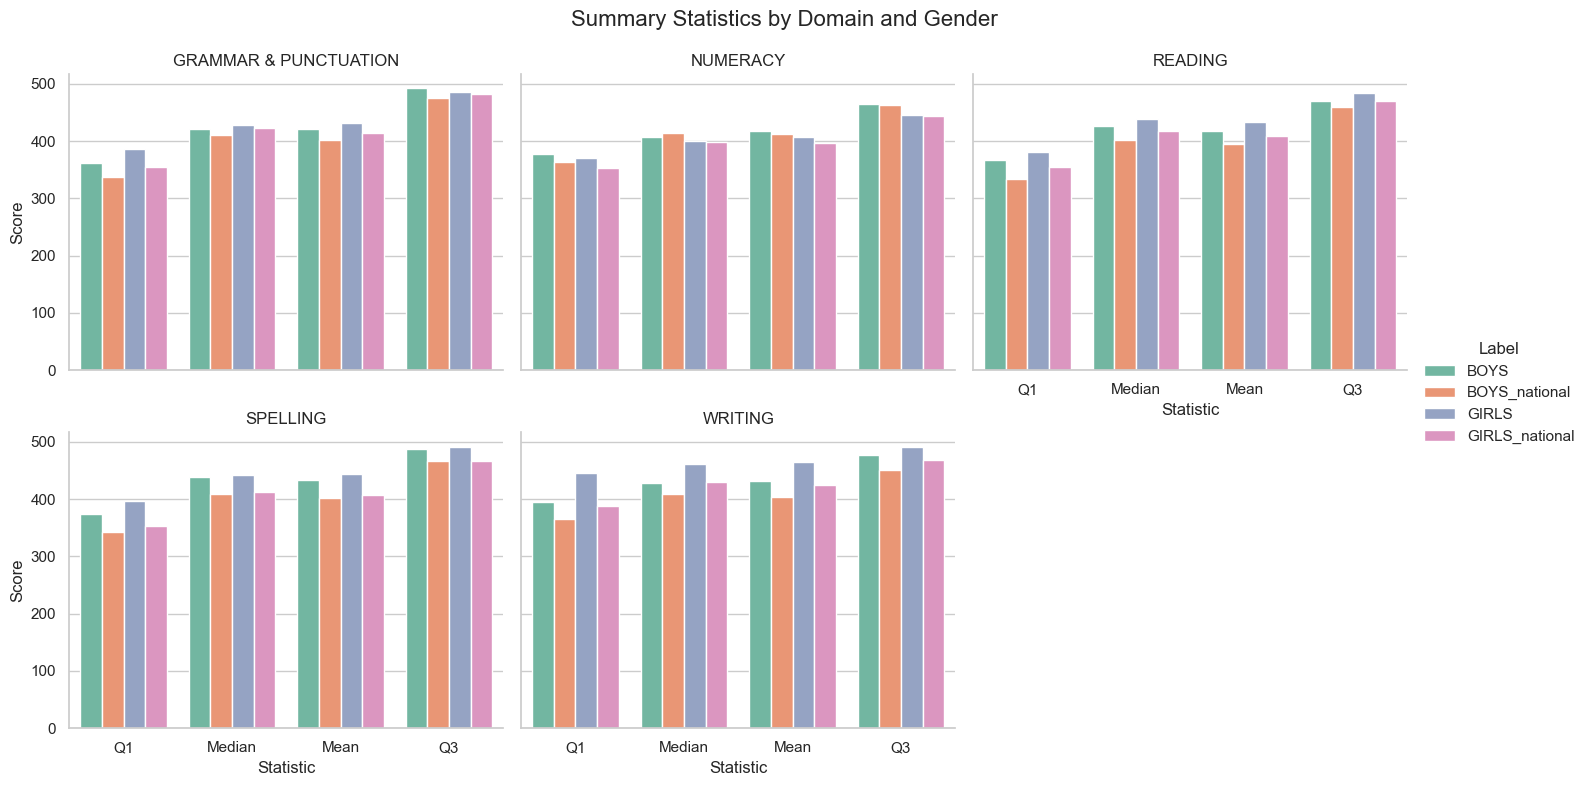

In [23]:
# Plotting boxplots

# Convert to long format for seperate plotting
df_genderwide = campus_function.df_melt(dt_genderconcat, id_vars=['Domain', 'Label'], value_vars=stat_to_plot, var_name='Statistic', value_name='Score')

# Plotting
gender_plot=campus_function.plot_comparison(df_genderwide,hue='Label', title='Summary Statistics by Domain and Gender')

### LBOTE Analysis

In [24]:
# Filtering the main dataset for LBOTE students
dt_lbote = dt_subset[dt_subset['LBOTE'] == 'Y']
#print(dt_lbote)

# Generating summary statistics for the whole school
lbote_summary = campus_function.summary_stats(dt_lbote, cols_of_interest=['READING','WRITING','SPELLING','NUMERACY','GRAMMAR & PUNCTUATION'])
print(lbote_summary)

# Resetting index, generating labels, and filtering columns
lbote_filt = (
    lbote_summary
    .reset_index()
    .rename(columns={'index': 'Domain'})
    .assign(label = 'LBOTE')
    [['Domain', 'Mean', 'Median', '25th %ile', '75th %ile', 'label']]
)

# Renaming columns
lbote_mappingdict = {
    'Domain': 'Domain',
    'Mean': 'Mean',
    'Median': 'Median',
    '25th %ile': 'Q1',
    '75th %ile': 'Q3',
    'label': 'Label'
}

lbote_filt = campus_function.col_rename(lbote_filt, mapping_dict=lbote_mappingdict)

                           n    Mean  Median    Std    Min  25th %ile  \
READING                198.0  425.88   431.0  69.30  230.0     373.25   
WRITING                195.0  449.81   461.0  51.67  258.0     412.00   
SPELLING               197.0  440.77   442.0  70.78  232.0     383.00   
NUMERACY               196.0  412.68   404.5  63.88  238.0     375.00   
GRAMMAR & PUNCTUATION  197.0  426.74   426.0  82.21  177.0     371.00   

                       75th %ile    Max  
READING                   483.00  604.0  
WRITING                   477.00  573.0  
SPELLING                  494.00  626.0  
NUMERACY                  451.25  629.0  
GRAMMAR & PUNCTUATION     492.00  629.0  


In [25]:
# Concatenating with the national dataset
lbote_nation = dt_national[(dt_national['Group Description'] == 'LBOTE')]
# Keeping columns
lbote_nation = lbote_nation[['Outcome', 'Mean', 'Median', 'p25', 'p75', 'Group Description']]
# Renaming columns
lbote_nation = campus_function.col_rename(lbote_nation, mapping_dict=nation_mappingdict)
# Changing label to 'nation'
lbote_nation['Label'] = lbote_nation['Label'] + '_national'
# Print
print(lbote_nation)

                   Domain    Mean  Median      Q1      Q3           Label
15                READING  409.63  417.68  353.25  473.03  LBOTE_national
16                WRITING  424.79  431.43  387.71  472.18  LBOTE_national
17               SPELLING  425.81  435.17  371.38  489.23  LBOTE_national
18               NUMERACY  412.37  413.47  361.53  464.63  LBOTE_national
19  GRAMMAR & PUNCTUATION  423.35  431.79  360.29  496.30  LBOTE_national


                   Domain    Mean  Median      Q1      Q3           Label
4   GRAMMAR & PUNCTUATION  426.74  426.00  371.00  492.00           LBOTE
19  GRAMMAR & PUNCTUATION  423.35  431.79  360.29  496.30  LBOTE_national
3                NUMERACY  412.68  404.50  375.00  451.25           LBOTE
18               NUMERACY  412.37  413.47  361.53  464.63  LBOTE_national
0                 READING  425.88  431.00  373.25  483.00           LBOTE
15                READING  409.63  417.68  353.25  473.03  LBOTE_national
2                SPELLING  440.77  442.00  383.00  494.00           LBOTE
17               SPELLING  425.81  435.17  371.38  489.23  LBOTE_national
1                 WRITING  449.81  461.00  412.00  477.00           LBOTE
16                WRITING  424.79  431.43  387.71  472.18  LBOTE_national


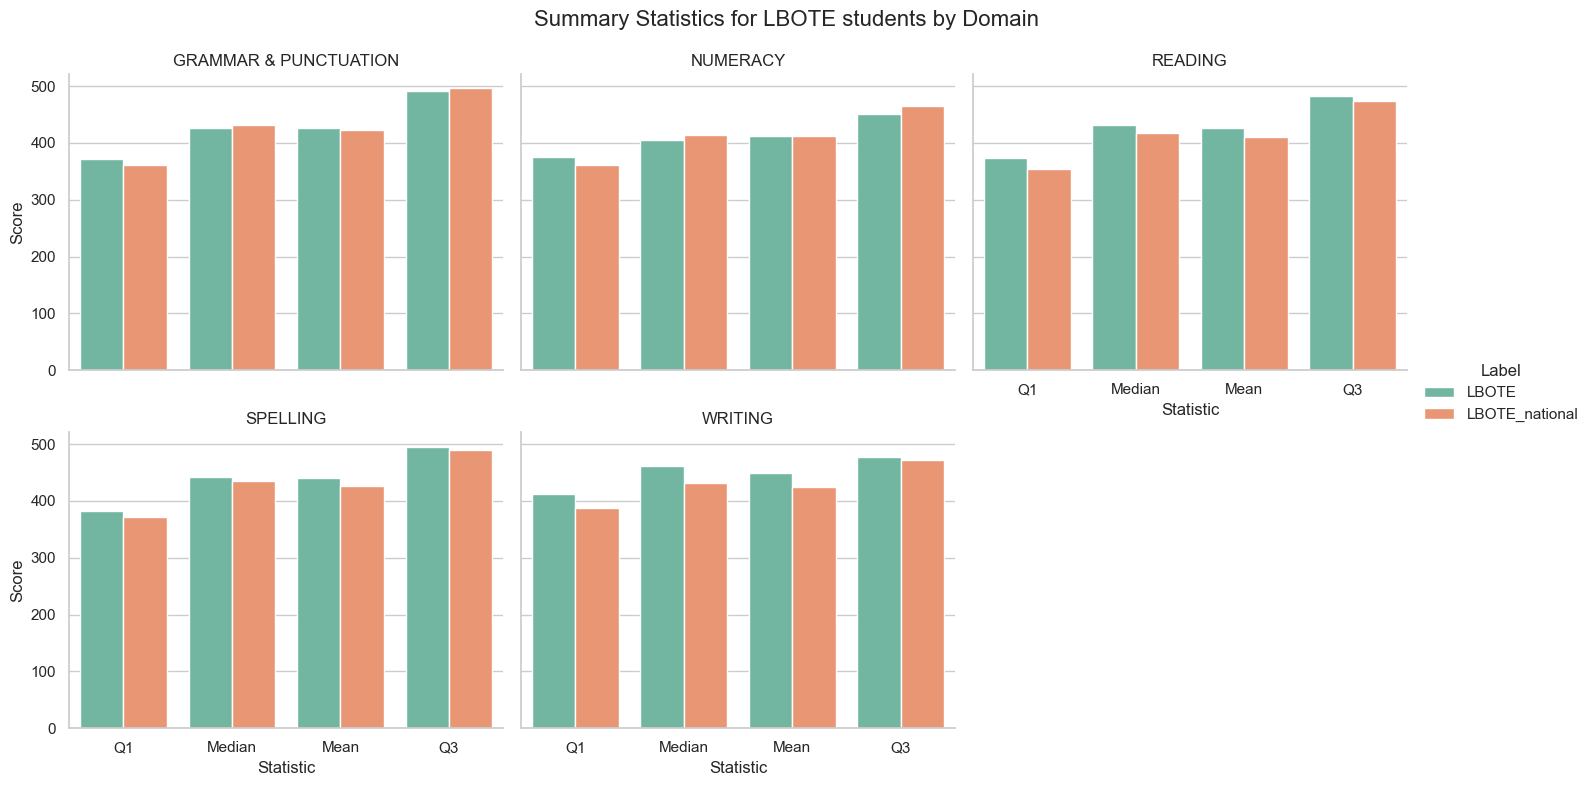

In [26]:
# Plotting

# Concatenating into single dataframe
lbote_all = pd.concat([lbote_filt, lbote_nation])
lbote_all = lbote_all.sort_values(by=['Domain', 'Label']) # Sorting
print(lbote_all)

# Melting
lbote_long = campus_function.df_melt(lbote_all, id_vars=['Domain', 'Label'], value_vars=stat_to_plot, var_name='Statistic', value_name='Score')

# Plotting
lbote_plot=campus_function.plot_comparison(lbote_long,hue='Label', title='Summary Statistics for LBOTE students by Domain')

### ATSI Analysis

In [27]:
# How many students are included in the ATSI subset?
ATSI_count= (dt_subset['ATSI'] == 0).sum()
print(f"Number of zeros in column 'ATSI': {ATSI_count}")

Number of zeros in column 'ATSI': 0


As none of the students are part of the ATSI subset, no further analysis can be performed.

Please only run the below code IF there are students who are part of this cohort. (Ctrl+/ to comment out lines)

In [28]:
# # Repeat the LBOTE Process for ATSI
# # Filtering the main dataset for students
# dt_atsi = dt_subset[dt_subset['ATSI'] == 'Y']

# # Generating summary statistics for the whole school
# atsi_summary = campus_function.summary_stats(dt_atsi, cols_of_interest=['READING','WRITING','SPELLING','NUMERACY','GRAMMAR & PUNCTUATION'])
# print(atsi_summary)

# # Resetting index, generating labels, and filtering columns
# atsi_filt = (
#     atsi_summary
#     .reset_index()
#     .rename(columns={'index': 'Domain'})
#     .assign(label = 'ATSI')
#     [['Domain', 'Mean', 'Median', '25th %ile', '75th %ile', 'label']]
# )

# # Renaming columns
# atsi_filt = campus_function.col_rename(atsi_filt, mapping_dict=lbote_mappingdict)
# # Concatenating with the national dataset
# atsi_nation = dt_national[(dt_national['Group Description'] == 'ATSI')]
# # Keeping columns
# atsi_nation = atsi_nation[['Outcome', 'Mean', 'Median', 'p25', 'p75', 'Group Description']]
# # Renaming columns
# atsi_nation = campus_function.col_rename(atsi_nation, mapping_dict=nation_mappingdict)
# # Changing label to 'nation'
# atsi_nation['Label'] = atsi_nation['Label'] + '_national'
# # Print
# print(atsi_nation)
# # Plotting
# # Concatenating into single dataframe
# atsi_all = pd.concat([atsi_filt, atsi_nation])
# atsi_all = atsi_all.sort_values(by=['Domain', 'Label']) # Sorting
# print(atsi_all)

# # Melting
# atsi_long = campus_function.df_melt(atsi_all, id_vars=['Domain', 'Label'], value_vars=stat_to_plot, var_name='Statistic', value_name='Score')

# # Plotting
# campus_function.plot_comparison(atsi_long,hue='Label', title='Summary Statistics for LBOTE students by Domain')

## Generating Median and IQR Comparisons

In [29]:
# # Gathering medians of interest
school_stats = {} # Making empty dictionary
# for loop to gather medians
for df in [dt_school, gender_all, lbote_filt]:  # change as required
    for label in df['Label'].unique():
        if label not in school_stats:
            school_stats[label] = {}
        # Convert Domain to Median for this label
        school_stats[label].update(
            df[df['Label'] == label].set_index('Domain')['Median'].to_dict()
        )


# Gather national 25th %tile and 75th %tile
iqr_nation = (
    dt_national[dt_national['Group Description'] != 'ATSI']
    .groupby('Group Description')[['Outcome', 'p10','p25', 'p50', 'p75','p90']] # group by each description
    .apply(lambda x: x.set_index('Outcome')[['p10','p25', 'p50', 'p75','p90']].to_dict('index')) # gets p25 and p75 information
    .to_dict() # save to dictionary
)

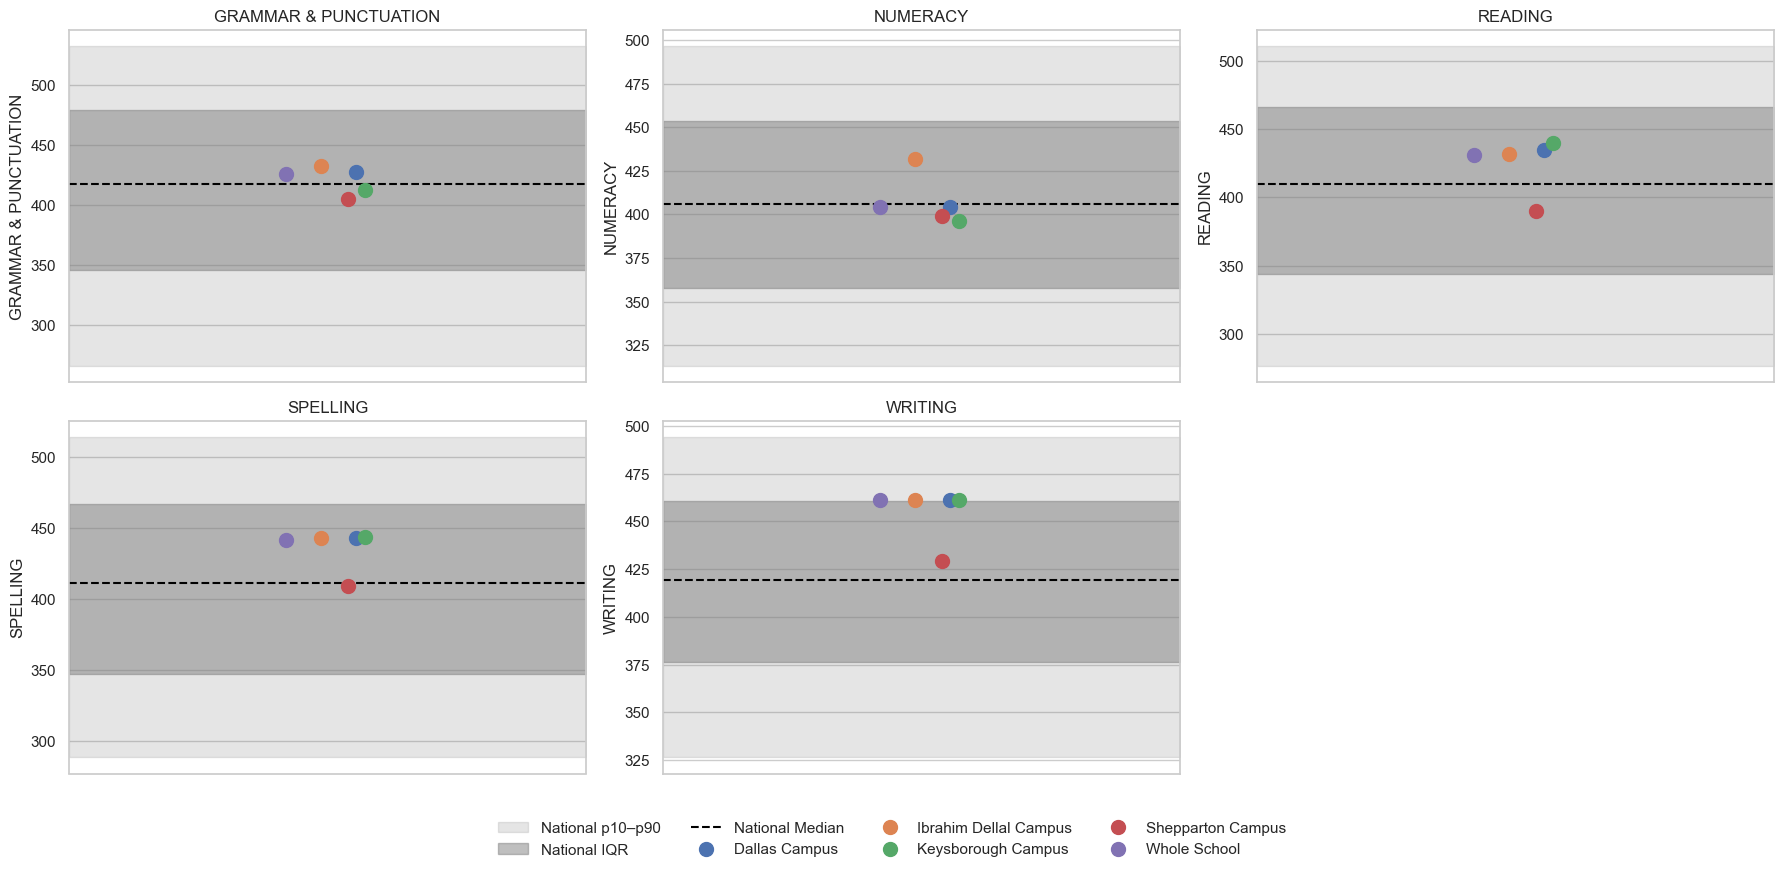

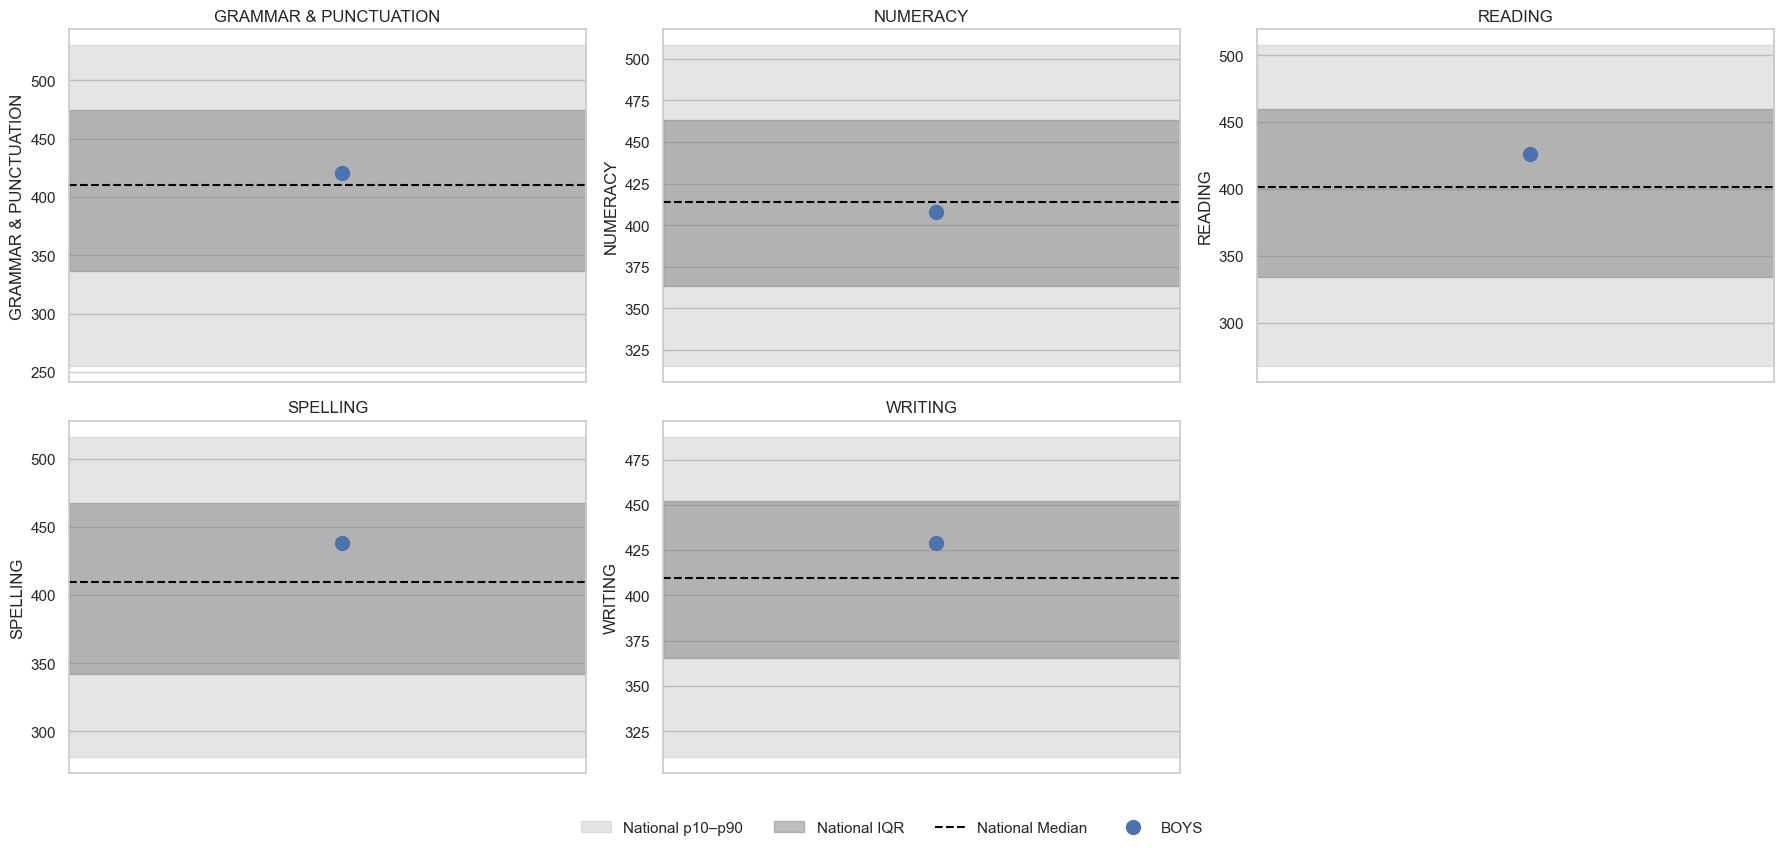

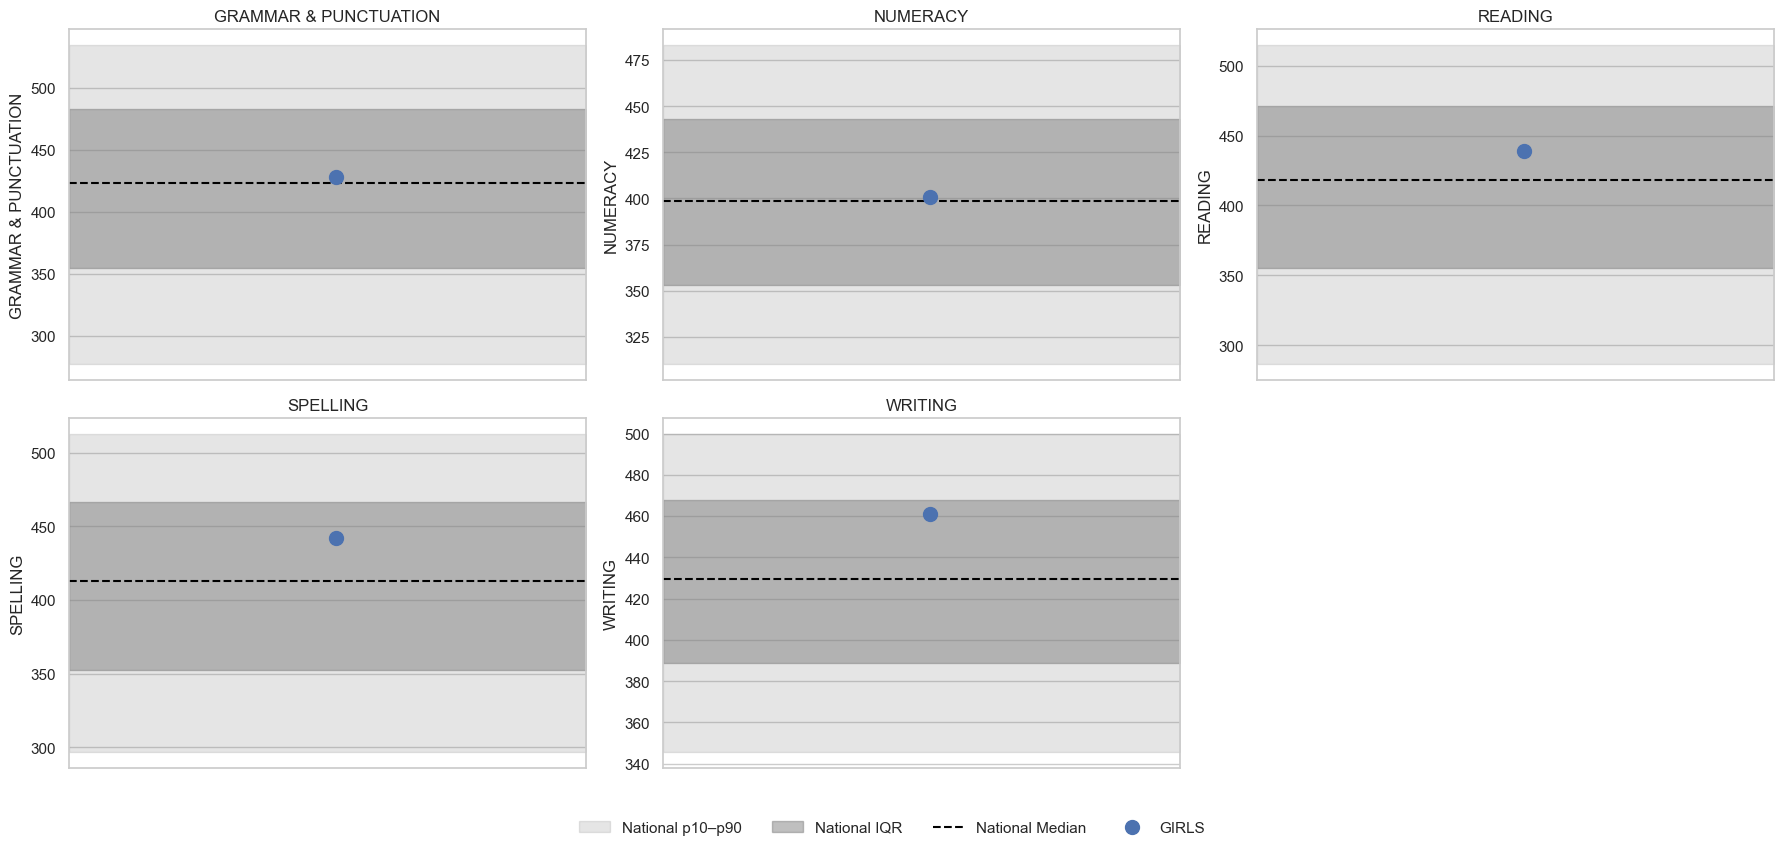

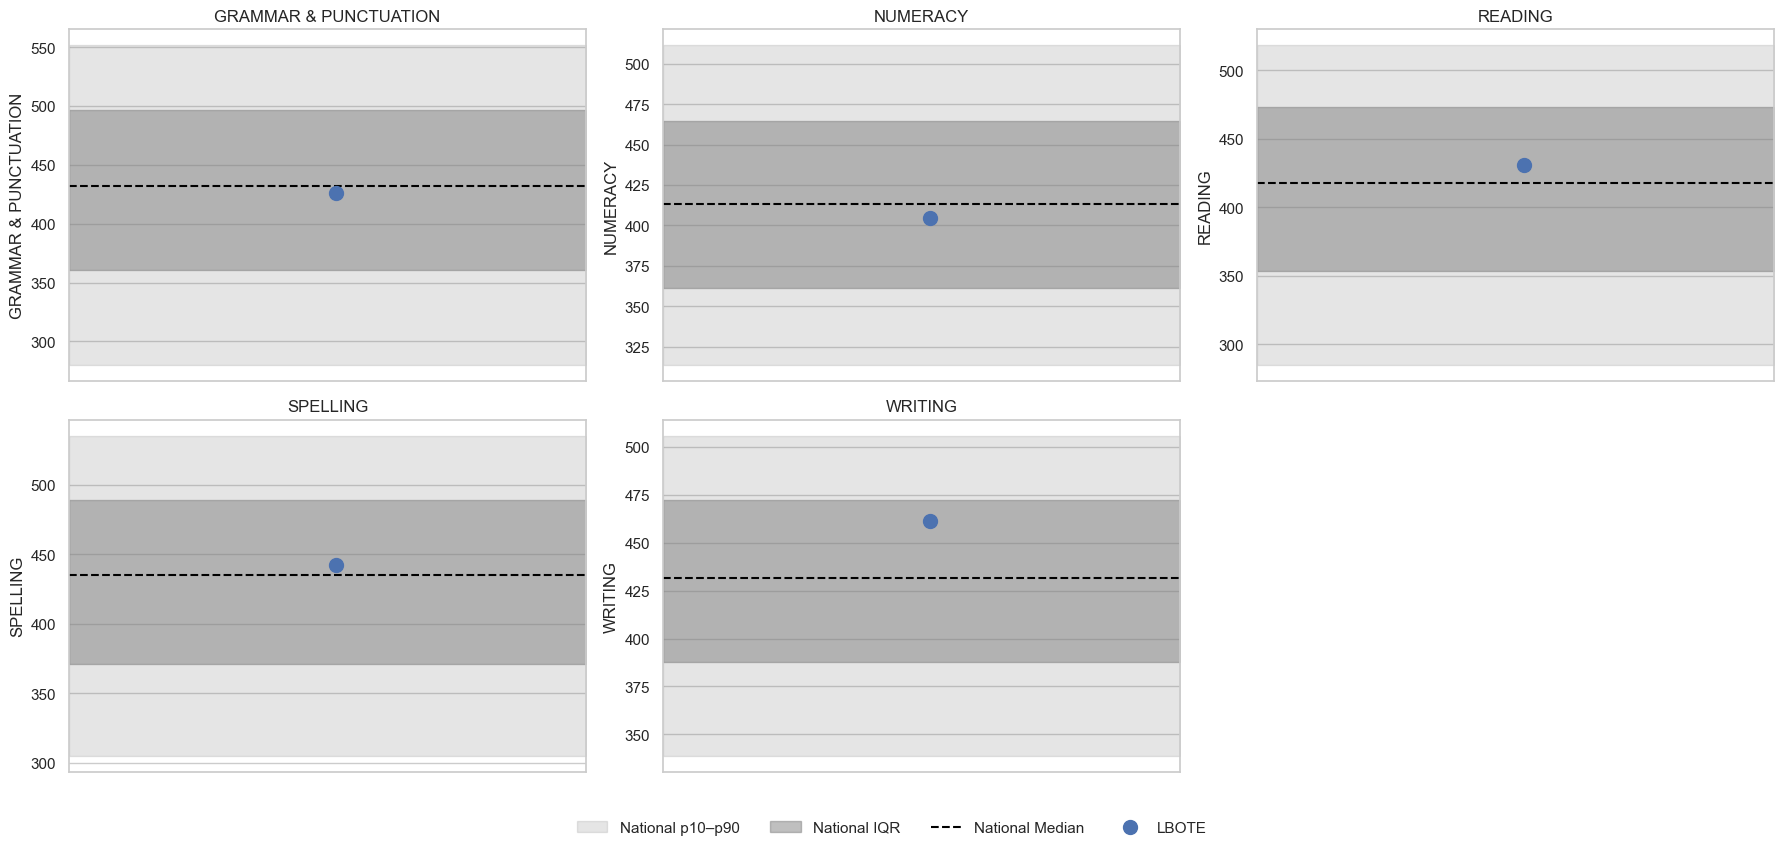

In [30]:
# Generating plot to visualise median school performance to national performance based on various criteria

# Automatically defining campuses
campus_toplot = dt_school['Label'].unique().tolist()

# Plot
campus_comp = campus_function.school_vs_national_figs(
    school_stats=school_stats, 
    national_stats=iqr_nation, 
    subgroups=['ALL'],
    school_label_map={'ALL': campus_toplot},
    ncols=3,
    jitter_width=0.1,
    random_seed=42
)

boys_comp = campus_function.school_vs_national_figs(
    school_stats=school_stats, 
    national_stats=iqr_nation, 
    subgroups=['BOYS'],
    school_label_map={'BOYS': ['BOYS']},
    ncols=3
)

girls_comp = campus_function.school_vs_national_figs(
    school_stats=school_stats, 
    national_stats=iqr_nation, 
    subgroups=['GIRLS'],
    school_label_map={'GIRLS': ['GIRLS'],},
    ncols=3
)

lbote_comp = campus_function.school_vs_national_figs(
    school_stats=school_stats, 
    national_stats=iqr_nation,
    subgroups=['LBOTE'],
    school_label_map={'LBOTE': ['LBOTE']},
    ncols=3    
)

## Saving to external file

In [31]:
# Saving

#campus_function.save_report(filename="Final_Report.html", title="Year 3 Analysis")

In [33]:
# Setting tables
tables = {
    'Whole School Summary Stats': school_summarystat,
    'National Stats': dt_national,
    'Summary Stats by Campus': campus_summaries,
    'Whole School and Campus Stats': all_summaries,
    'School and National Stats': dt_schoolNation,
    'Gender Breakdown within School': gender_summaries,
    'Gender Comparison': dt_genderconcat,
    'LBOTE Summary within School': lbote_summary,
    'LBOTE Comparison': lbote_all
}
# Saving plots
plots={
    "Score Distribution Across Campuses": fig,
    "Domain-wise Campus vs Nation Comparison": campus_plot,
    "Gender-wise Campus vs Nation Comparison": gender_plot,
    "LBOTE-wise Campus vs Nation Comparison": lbote_plot,
    "Score Distribution Across Campuses": fig,
    "Median Score for Campuses against National Score Spread": campus_comp,
    "School's Median Score for Boys against National Score Spread": boys_comp,
    "School's Median Score for Girls against National Score Spread": girls_comp,
    "Median Score of School's LBOTE students against National Score Spread": lbote_comp
}

campus_function.save_report(
    filename="Final_Report_Draft2.html",
    title="Year 3 Analysis",
    figures=plots,
    tables=tables
)

Report saved to c:\Users\Debbie.Chong\Virtual_env\Final_Report_Draft2.html
